<a href="https://colab.research.google.com/github/Fatimah007/Exercises-/blob/main/Copy_of_LSTM_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('traffic.csv')

In [ ]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

In [ ]:
df.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [ ]:
# Scaling the 'Vehicles' column
scaler = MinMaxScaler(feature_range=(0, 1))
df['Vehicles_scaled'] = scaler.fit_transform(df[['Vehicles']])

In [ ]:
# Prepare the data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
df[['Vehicles_scaled']].values

array([[0.07821229],
       [0.06703911],
       [0.05027933],
       ...,
       [0.08379888],
       [0.11731844],
       [0.06145251]])

In [ ]:
time_step = 24
scaled_data = df[['Vehicles_scaled']].values

In [ ]:
scaled_data

array([[0.07821229],
       [0.06703911],
       [0.05027933],
       ...,
       [0.08379888],
       [0.11731844],
       [0.06145251]])

In [ ]:
scaled_data.shape

(48120, 1)

In [ ]:
X, Y = create_dataset(scaled_data, time_step)

In [ ]:
X

array([[0.07821229, 0.06703911, 0.05027933, ..., 0.10055866, 0.10614525,
        0.07821229],
       [0.06703911, 0.05027933, 0.03351955, ..., 0.10614525, 0.07821229,
        0.0726257 ],
       [0.05027933, 0.03351955, 0.04469274, ..., 0.07821229, 0.0726257 ,
        0.06145251],
       ...,
       [0.06703911, 0.06145251, 0.07821229, ..., 0.08379888, 0.08938547,
        0.05586592],
       [0.06145251, 0.07821229, 0.05586592, ..., 0.08938547, 0.05586592,
        0.16201117],
       [0.07821229, 0.05586592, 0.04469274, ..., 0.05586592, 0.16201117,
        0.08379888]])

In [ ]:
X[1]

array([0.06703911, 0.05027933, 0.03351955, 0.04469274, 0.02793296,
       0.04469274, 0.03910615, 0.05586592, 0.06145251, 0.07821229,
       0.08938547, 0.08379888, 0.07821229, 0.08379888, 0.06145251,
       0.06145251, 0.08379888, 0.08938547, 0.10614525, 0.08938547,
       0.10055866, 0.10614525, 0.07821229, 0.0726257 ])

In [ ]:
Y

array([0.0726257 , 0.06145251, 0.0726257 , ..., 0.16201117, 0.08379888,
       0.11731844])

In [ ]:
Y[1]

0.061452513966480445

In [ ]:
X.shape

(48095, 24)

In [ ]:
X.shape[0]

48095

In [ ]:
# Reshape input to [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 24, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,301 (282.43 KB)

 Trainable params: 72,301 (282.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 46s 68ms/step - loss: 0.0034 - val_loss: 7.9177e-04
Epoch 2/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 84s 71ms/step - loss: 9.9210e-04 - val_loss: 6.4887e-04
Epoch 3/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 78s 66ms/step - loss: 8.7332e-04 - val_loss: 6.7138e-04
Epoch 4/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - loss: 8.5252e-04 - val_loss: 5.8234e-04
Epoch 5/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - loss: 8.0163e-04 - val_loss: 5.8698e-04
Epoch 6/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - loss: 7.8270e-04 - val_loss: 5.6346e-04
Epoch 7/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - loss: 8.0929e-04 - val_loss: 5.7178e-04
Epoch 8/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - loss: 7.9785e-04 - val_loss: 5.5085e-04
Epoch 9/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - loss: 7.5012e-04 - val_loss: 5.6633e-04
Epoch 10/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 90s 83ms/step - loss: 7.6616e-04 - val_loss: 6.5133e-04


301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step


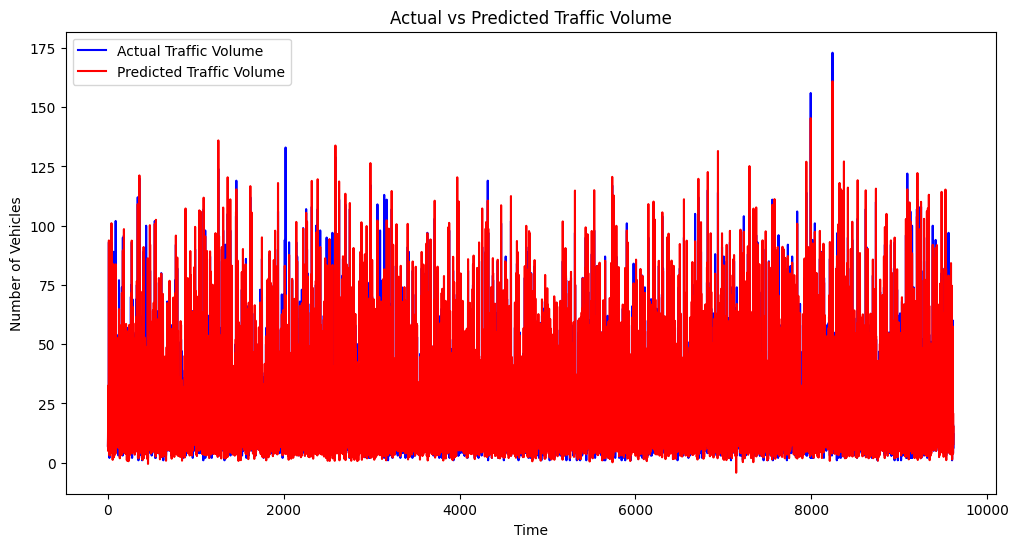

In [ ]:
predictions = model.predict(X_test)

predictions_rescaled = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 1))), axis=1))[:, 0]
Y_test_rescaled = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], 1))), axis=1))[:, 0]

plt.figure(figsize=(12,6))
plt.plot(Y_test_rescaled, label='Actual Traffic Volume', color='blue')
plt.plot(predictions_rescaled, label='Predicted Traffic Volume', color='red')
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()